<html>
    <div style="padding: 50px; background-color: lightskyblue; text-align: center; color: #000;">
        <h1>CAB420 Workshop - Week 1 Practical</h1>
        <h2>Linear Regression</h2>
    </div>
</html>

Using the provided dataset (either the individual files and your own approach to merge the data, or the `combined.csv` merged dataset), split the data into training, validation and testing as follows:

- Training: All data from the years 2014-2018
- Validation: All data from 2017
- Testing: All data from 2018

Develop a regression model to predict one of the cycleway data series (select whichever one takes your fancy) in your dataset. In developing the model, you should:

- Initially, use all weather data (temperature, rainfall, solar exposure) and all other data series for a particular counter type (i.e. if you're predicting cyclists inbound for the counter, use all other cyclist inbound counters).

- Use p-values, qqplot, correlation between predictors andresponse, correlation between pairs of predictor, sand performance on the validation set to remove terms and improve the model

When you have finished refining the model, evaluate it on the test set and compare the Root Mean Squared Error (RMSE) for the training, validation and test sets. 

In training the model, you will need to ensure that you have no samples (i.e.rows) with missing data. As such, you should remove samples with missing data from the dataset before training and evaluating the model. This may also mean that you have to remove some columns that contain large amounts of missing data (i.e. determine how many samples are missing from each column, remove columns with lots of missing data, remove any other rows where data is missing). 

We recommend the `statsmodels` and `pandas` packages for this problem. In particular, you may wish to use:
- `isna`: A member function of a pandas dataframe that indicates if a variable is missing 
- `dropna`: A member function of a pandas dataframe that drops missing values
- `statsmodels.api.OLS`: Ordinary Least Squares regression function within `statsmodels`.

You may also wish to explore the `sklearn` package which also contains methods for linear regression and data splitting.

## Installing Packages Loading in the Dataset

In [342]:
import pandas as pd
from  sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [376]:
# Importing the dataset
combined_data = pd.read_csv('data/combined.csv')

In [377]:
combined_data

,Unnamed: 0,Rainfall amount (millimetres),Date,Maximum temperature (Degree C),Daily global solar exposure (MJ/m*m),North Brisbane Bikeway Mann Park Windsor Cyclists Outbound,Jack Pesch Bridge Pedestrians Outbound,Story Bridge East Pedestrian Inbound,Kedron Brook Bikeway Lutwyche Pedestrians Outbound,Kedron Brook Bikeway Mitchelton Pedestrian Outbound,...,Story Bridge East Pedestrian Outbound,North Brisbane Bikeway Mann Park Windsor Pedestrian Outbound,Story Bridge West Cyclists Inbound,Bicenntenial Bikeway,Story Bridge East Cyclists Inbound,Bishop Street Pedestrians Inbound,Story Bridge West Cyclists Outbound,North Brisbane Bikeway Mann Park Windsor Pedestrian Inbound,Kedron Brook Bikeway Mitchelton Pedestrian Inbound,Schulz Canal Bridge Cyclists Inbound
0,0,0.0,2014-01-01,30.6,31.2,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,0.0,3333.0,0.0,NaN,0.0,NaN,NaN,92.0
1,1,0.0,2014-01-02,31.8,23.4,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,0.0,4863.0,0.0,NaN,0.0,NaN,NaN,123.0
2,2,1.0,2014-01-03,34.5,29.6,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,0.0,3905.0,0.0,NaN,0.0,NaN,NaN,77.0
3,3,0.0,2014-01-04,38.7,30.5,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,0.0,3066.0,0.0,NaN,0.0,NaN,NaN,57.0
4,4,0.0,2014-01-05,33.6,15.7,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,0.0,4550.0,0.0,NaN,0.0,NaN,NaN,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1821,0.0,2018-12-27,29.5,29.7,NaN,244.0,98.0,315.0,93.0,...,307.0,115.0,91.0,3489.0,125.0,81.0,NaN,176.0,141.0,88.0
1822,1822,0.0,2018-12-28,29.7,28.6,NaN,250.0,148.0,328.0,129.0,...,411.0,138.0,104.0,3521.0,184.0,56.0,NaN,164.0,128.0,78.0
1823,1823,0.0,2018-12-29,30.5,29.8,NaN,184.0,135.0,461.0,117.0,...,371.0,70.0,100.0,3480.0,179.0,109.0,NaN,131.0,105.0,63.0
1824,1824,0.0,2018-12-30,30.6,27.9,NaN,138.0,105.0,288.0,116.0,...,330.0,116.0,93.0,3501.0,159.0,71.0,NaN,146.0,128.0,124.0


Looks like there are a few columns with missing data. Time to check which ones they are and remove them accordingly

In [379]:
missing_data_count = 0

for variable in combined_data.columns.to_list():
    if combined_data[variable].isna().sum() > 0:
        missing_data_count += 1
    print(f'Number of missing values for {variable}: {combined_data[variable].isna().sum()}')

    print(f'Number of missing values: {missing_data_count}')

Number of missing values for Unnamed: 0: 0
Number of missing values: 0
Number of missing values for Rainfall amount (millimetres): 39
Number of missing values: 1
Number of missing values for Date: 0
Number of missing values: 1
Number of missing values for Maximum temperature (Degree C): 24
Number of missing values: 2
Number of missing values for Daily global solar exposure (MJ/m*m): 1
Number of missing values: 3
Number of missing values for North Brisbane Bikeway Mann Park Windsor Cyclists Outbound: 534
Number of missing values: 4
Number of missing values for Jack Pesch Bridge Pedestrians Outbound: 551
Number of missing values: 5
Number of missing values for Story Bridge East Pedestrian Inbound: 80
Number of missing values: 6
Number of missing values for Kedron Brook Bikeway Lutwyche Pedestrians Outbound: 408
Number of missing values: 7
Number of missing values for Kedron Brook Bikeway Mitchelton Pedestrian Outbound: 528
Number of missing values: 8
Number of missing values for Ekibin P

There are many counts that do not have a single record. Removing those from the dataset

In [ ]:
for variable in counts2014.columns.to_list():
    if counts2014[variable].isna().sum() > :
        counts2014.drop(variable, axis=1, inplace=True)

for variable in counts2014.columns.to_list():
    if 'Pedestrians' in variable:
        counts2014.drop(variable, axis=1, inplace=True)
counts2014.drop('Unnamed: 1', axis=1, inplace=True)

In [347]:
counts2014

,Date,Bicenntenial Bikeway,Bicentennial Bikeway Cyclists Inbound,Bicentennial Bikeway Cyclists Outbound,Eleanor Schonell Bridge Cyclists,Eleanor Schonell Bridge Cyclists Inbound,Eleanor Schonell Bridge Cyclists Outbound,Schulz Canal Bridge,Schulz Canal Bridge Cyclists Inbound,Schulz Canal Bridge Cyclists Outbound,Story Bridge East,Story Bridge East Pedestrian Inbound,Story Bridge East Pedestrian Outbound,Story Bridge East Cyclists Inbound,Story Bridge East Cyclists Outbound,Story Bridge West,Story Bridge West Pedestrian Inbound,Story Bridge West Pedestrian Outbound,Story Bridge West Cyclists Inbound,Story Bridge West Cyclists Outbound
0,1/01/2014,3333,569,572,691,301,390,149,92,56,0,0,0,0,0,0,0,0,0,0
1,2/01/2014,4863,658,700,1020,473,547,247,123,65,0,0,0,0,0,0,0,0,0,0
2,3/01/2014,3905,463,412,931,442,489,201,77,78,0,0,0,0,0,0,0,0,0,0
3,4/01/2014,3066,410,364,574,245,329,124,57,38,0,0,0,0,0,0,0,0,0,0
4,5/01/2014,4550,654,641,941,398,543,227,92,85,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27/12/2014,95,46,49,511,511,0,40,11,11,0,0,0,0,0,313,170,110,26,7
361,28/12/2014,188,92,96,0,0,0,68,25,19,0,0,0,0,0,731,372,235,94,30
362,29/12/2014,287,161,126,0,0,0,118,43,41,0,0,0,0,0,697,255,191,180,71
363,30/12/2014,451,304,147,0,0,0,151,62,49,0,0,0,0,0,728,295,162,216,55


In [348]:
for variable in counts2014.columns.to_list():
    print(f'Number of missing values for {variable}: {counts2014[variable].isna().sum()}')

Number of missing values for Date: 0
Number of missing values for Bicenntenial Bikeway: 0
Number of missing values for Bicentennial Bikeway Cyclists Inbound: 0
Number of missing values for Bicentennial Bikeway Cyclists Outbound: 0
Number of missing values for Eleanor Schonell Bridge Cyclists: 0
Number of missing values for Eleanor Schonell Bridge Cyclists Inbound: 0
Number of missing values for Eleanor Schonell Bridge Cyclists Outbound: 0
Number of missing values for Schulz Canal Bridge: 0
Number of missing values for Schulz Canal Bridge Cyclists Inbound: 0
Number of missing values for Schulz Canal Bridge Cyclists Outbound: 0
Number of missing values for Story Bridge East : 0
Number of missing values for Story Bridge East Pedestrian Inbound: 0
Number of missing values for Story Bridge East Pedestrian Outbound: 0
Number of missing values for Story Bridge East Cyclists Inbound: 0
Number of missing values for Story Bridge East Cyclists Outbound: 0
Number of missing values for Story Bridge

Now that the data has been cleaned of na values, time to build the initial Linear Regression model.

Dropping the date column from the regression dataset

In [349]:
counts2014 = counts2014.drop('Date', axis=1)
counts_2015 = counts2015.drop('Date', axis=1)
counts_2016 = counts2016.drop('Date', axis=1)
counts_2017 = counts2017.drop('Date', axis=1)
counts_2018 = counts2018.drop('Date', axis=1)

In [350]:
all_cyclist_counts

,Bicenntenial Bikeway,Bicentennial Bikeway Cyclists Inbound,Bicentennial Bikeway Cyclists Outbound,Eleanor Schonell Bridge Cyclists,Eleanor Schonell Bridge Cyclists Inbound,Eleanor Schonell Bridge Cyclists Outbound,Schulz Canal Bridge,Schulz Canal Bridge Cyclists Inbound,Schulz Canal Bridge Cyclists Outbound,Story Bridge East,...,4G_Kangaroo Point18 Cyclists OUT,Lambert Rd Indooroopilly (4G),4G_Lambert Rd Indooroopilly Cyclists Towards CIty,4G_Lambert Rd Indooroopilly Cyclists Away from City,Norman Creek Bridge,Norman Park (4G),North Brisbane Bikeway Windsor (4G),Schulz Canal Bridge Nundah (4G),Story Bridge East (4G),Story Bridge West (4G)
0,None,569.0,572.0,691.0,301.0,390.0,149.0,92.0,56.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,658.0,700.0,1020.0,473.0,547.0,247.0,123.0,65.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,463.0,412.0,931.0,442.0,489.0,201.0,77.0,78.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,410.0,364.0,574.0,245.0,329.0,124.0,57.0,38.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,654.0,641.0,941.0,398.0,543.0,227.0,92.0,85.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,None,1172.0,1199.0,NaN,NaN,NaN,NaN,88.0,636.0,NaN,...,543.0,480.0,93.0,387.0,181.0,73.0,112.0,690.0,106.0,323.0
1822,None,1194.0,1224.0,NaN,NaN,NaN,NaN,78.0,886.0,NaN,...,576.0,570.0,116.0,454.0,204.0,85.0,95.0,334.0,143.0,376.0
1823,None,1159.0,1237.0,NaN,NaN,NaN,NaN,63.0,798.0,NaN,...,536.0,668.0,206.0,462.0,128.0,57.0,78.0,112.0,113.0,393.0
1824,None,1234.0,1138.0,NaN,NaN,NaN,NaN,124.0,716.0,NaN,...,654.0,539.0,136.0,403.0,177.0,76.0,90.0,50.0,122.0,337.0


In [366]:
all_cyclist_counts = pd.concat([counts2014, counts2015, counts2016, counts2017, counts2018], axis=0).reset_index(drop=True)
all_cyclist_counts

all_cyclist_counts['Bicenntenial Bikeway'].isna().sum()

all_cyclist_counts['Bicenntenial Bikeway'].fillna(all_cyclist_counts['Bicenntenial Bikeway'].mean(), inplace=True)

y_train = all_cyclist_counts['Bicenntenial Bikeway']

/var/folders/h9/_mkwm6vx2qjf9s5hb6rlyg8c0000gn/T/ipykernel_25949/2827822890.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_cyclist_counts['Bicenntenial Bikeway'].fillna(all_cyclist_counts['Bicenntenial Bikeway'].mean(), inplace=True)


In [367]:
y_train

0       3333.0
1       4863.0
2       3905.0
3       3066.0
4       4550.0
         ...  
1821    3489.0
1822    3521.0
1823    3480.0
1824    3501.0
1825    3376.0
Name: Bicenntenial Bikeway, Length: 1826, dtype: float64

In [352]:
x_rainfall_data_2014 = pd.Series(rainfall_data_2014['Rainfall amount (millimetres)']).reset_index(drop=True)
x_temperature_data_2014 = pd.Series(temperature_data_2014['Maximum temperature (Degree C)']).reset_index(drop=True)
x_solar_exposure_data_2014 = solar_exposure_data_2014['Daily global solar exposure (MJ/m*m)'].reset_index(drop=True)

x_rainfall_data_2015 = pd.Series(rainfall_data_2015['Rainfall amount (millimetres)']).reset_index(drop=True)
x_temperature_data_2015 = pd.Series(temperature_data_2015['Maximum temperature (Degree C)']).reset_index(drop=True)
x_solar_exposure_data_2015 = solar_exposure_data_2015['Daily global solar exposure (MJ/m*m)'].reset_index(drop=True)

x_rainfall_data_2016 = pd.Series(rainfall_data_2016['Rainfall amount (millimetres)']).reset_index(drop=True)
x_temperature_data_2016 = pd.Series(temperature_data_2016['Maximum temperature (Degree C)']).reset_index(drop=True)
x_solar_exposure_data_2016 = solar_exposure_data_2016['Daily global solar exposure (MJ/m*m)'].reset_index(drop=True)

x_rainfall_data_2017 = pd.Series(rainfall_data_2017['Rainfall amount (millimetres)']).reset_index(drop=True)
x_temperature_data_2017 = pd.Series(temperature_data_2017['Maximum temperature (Degree C)']).reset_index(drop=True)
x_solar_exposure_data_2017 = solar_exposure_data_2017['Daily global solar exposure (MJ/m*m)'].reset_index(drop=True)

x_rainfall_data_2018 = pd.Series(rainfall_data_2018['Rainfall amount (millimetres)']).reset_index(drop=True)
x_temperature_data_2018 = pd.Series(temperature_data_2018['Maximum temperature (Degree C)']).reset_index(drop=True)
x_solar_exposure_data_2018 = solar_exposure_data_2018['Daily global solar exposure (MJ/m*m)'].reset_index(drop=True)

x_train_rainfall = pd.concat([x_rainfall_data_2014, x_rainfall_data_2015, x_rainfall_data_2016, x_rainfall_data_2017, x_rainfall_data_2018], axis=0)
x_train_temperature = pd.concat([x_temperature_data_2014, x_temperature_data_2015, x_temperature_data_2016, x_temperature_data_2017, x_temperature_data_2018], axis=0)
x_train_solar_exposure = pd.concat([x_solar_exposure_data_2014, x_solar_exposure_data_2015, x_solar_exposure_data_2016, x_solar_exposure_data_2017, x_solar_exposure_data_2018], axis=0)

x_train = pd.concat([x_train_rainfall, x_train_temperature, x_train_solar_exposure], axis=1)

x_validation = pd.concat([x_rainfall_data_2017, x_temperature_data_2017, x_solar_exposure_data_2017], axis=1)
x_test = pd.concat([x_rainfall_data_2018, x_temperature_data_2018, x_solar_exposure_data_2018], axis=1)

In [353]:
x_train['Rainfall amount (millimetres)'] = x_train['Rainfall amount (millimetres)'].fillna(x_train['Rainfall amount (millimetres)'].mean())
x_train['Maximum temperature (Degree C)'] = x_train['Maximum temperature (Degree C)'].fillna(x_train['Maximum temperature (Degree C)'].mean())
x_train['Daily global solar exposure (MJ/m*m)'] = x_train['Daily global solar exposure (MJ/m*m)'].fillna(x_train['Daily global solar exposure (MJ/m*m)'].mean())

In [354]:
x_train = x_train.reset_index(drop=True)
x_train

,Rainfall amount (millimetres),Maximum temperature (Degree C),Daily global solar exposure (MJ/m*m)
0,0.0,30.6,31.2
1,0.0,31.8,23.4
2,1.0,34.5,29.6
3,0.0,38.7,30.5
4,0.0,33.6,15.7
...,...,...,...
1821,0.0,29.5,29.7
1822,0.0,29.7,28.6
1823,0.0,30.5,29.8
1824,0.0,30.6,27.9


Using statsmodels:

In [357]:
y_train

In [368]:
statsmodels_lm = sm.OLS(y_train, x_train).fit()
statsmodels_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Bicenntenial Bikeway   R-squared (uncentered):                   0.897
Model:                              OLS   Adj. R-squared (uncentered):              0.896
Method:                   Least Squares   F-statistic:                              5271.
Date:                  Fri, 28 Feb 2025   Prob (F-statistic):                        0.00
Time:                          17:30:52   Log-Likelihood:                         -15928.
No. Observations:                  1826   AIC:                                  3.186e+04
Df Residuals:                      1823   BIC:                                  3.188e+04
Df Model:                             3                                                  
Covariance Type:              nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Rainfall amount (millimetres)          -18.3782      3.280     -5.604      0.000     -24.810     -11.946
Maximum temperature (Degree C)         152.7912      4.950     30.865      0.000     143.082     162.500
Daily global solar exposure (MJ/m*m)    13.7654      6.894      1.997      0.046       0.245      27.286
==============================================================================
Omnibus:                      380.327   Durbin-Watson:                   0.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1040.980
Skew:                          -1.086   Prob(JB):                    9.00e-227
Kurtosis:                       5.994   Cond. No.                         8.07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It appears the model itself is highly significant (p-val < 1.58e-154). R-squared shows that the model fits fairly well without evidence of major overfitting. The possible way to improve this model is by removing solar exposure from the model.

## QQ Plot of the residuals

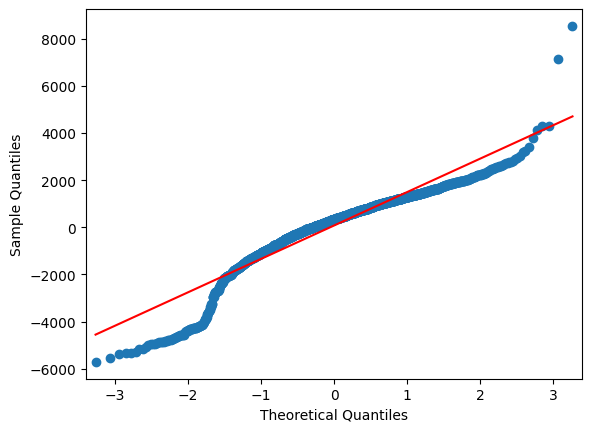

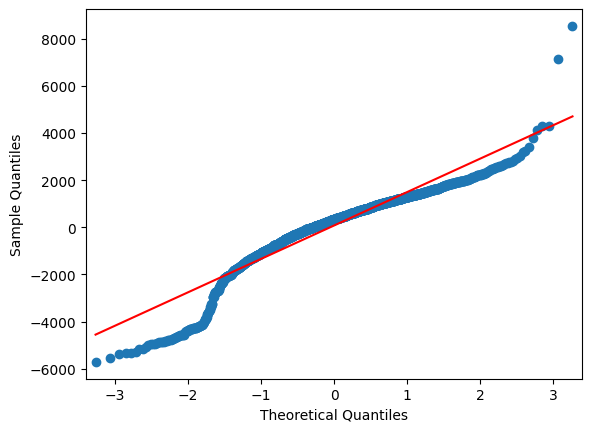

In [369]:
sm.qqplot(statsmodels_lm.resid, line='r')

The residuals do not fit along the line, indicating that the residuals are not normally distributed.

## Correlation Plot

<Axes: >

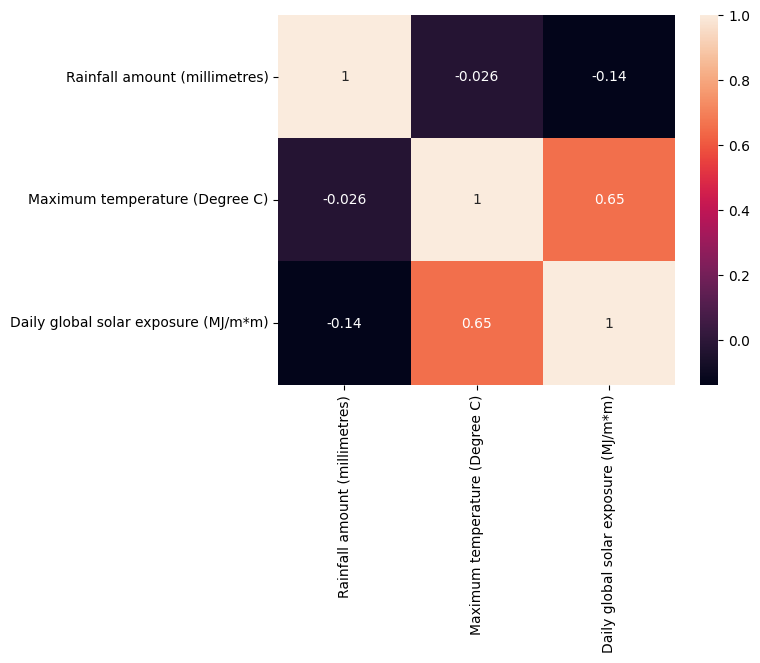

In [372]:
correlation_number_matrix = x_train.corr()
correlation_number_matrix

sns.heatmap(correlation_number_matrix, annot=True)

In [373]:
x_train_improve = x_train.drop('Daily global solar exposure (MJ/m*m)', axis=1)

In [374]:
statsmodels_lm_improve = sm.OLS(y_train, x_train_improve).fit()
statsmodels_lm_improve.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Bicenntenial Bikeway   R-squared (uncentered):                   0.896
Model:                              OLS   Adj. R-squared (uncentered):              0.896
Method:                   Least Squares   F-statistic:                              7891.
Date:                  Fri, 28 Feb 2025   Prob (F-statistic):                        0.00
Time:                          17:32:37   Log-Likelihood:                         -15930.
No. Observations:                  1826   AIC:                                  3.186e+04
Df Residuals:                      1824   BIC:                                  3.188e+04
Df Model:                             2                                                  
Covariance Type:              nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Rainfall amount (millimetres)    -19.4976      3.234     -6.029      0.000     -25.840     -13.155
Maximum temperature (Degree C)   162.3209      1.316    123.324      0.000     159.739     164.902
==============================================================================
Omnibus:                      380.525   Durbin-Watson:                   0.480
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1021.083
Skew:                          -1.094   Prob(JB):                    1.88e-222
Kurtosis:                       5.938   Cond. No.                         2.56
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Checking the residuals

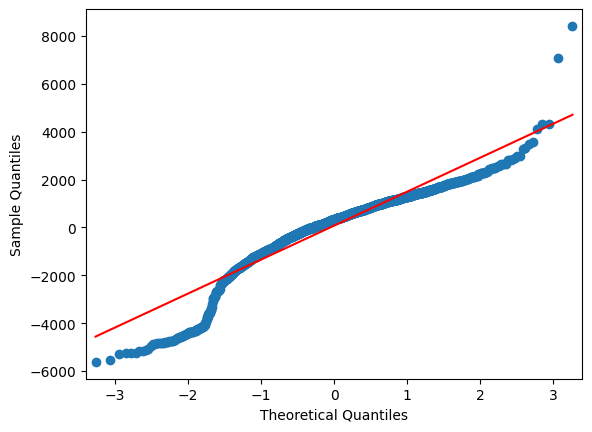

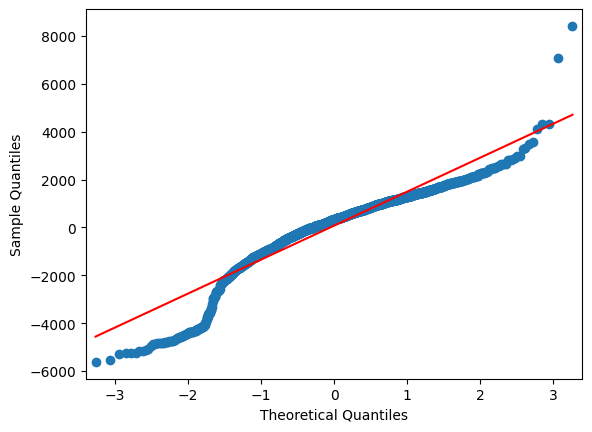

In [375]:
sm.qqplot(statsmodels_lm_improve.resid, line='r')

Looks like the model improve very slightly. Time to test it on the validation and training sets